   ## Overview

This notebook is my proposition for the Housing Prices Competition, one of the most famous competitions on Kaggle.

Our goal is to predict the final price of a house based on its characteristics.Therefore, it is a typical regression task since we need to predict a continuous value,for that we will go with two  main steps:

The first one is on pre-processing our data.

The second section is on building ML models and evaluating their predictive performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting The Data
df=pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#dropping Unamed column
df=df.drop('Unnamed: 0',axis=1)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [5]:
#some statistical info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
#checking for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [7]:
#data types
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

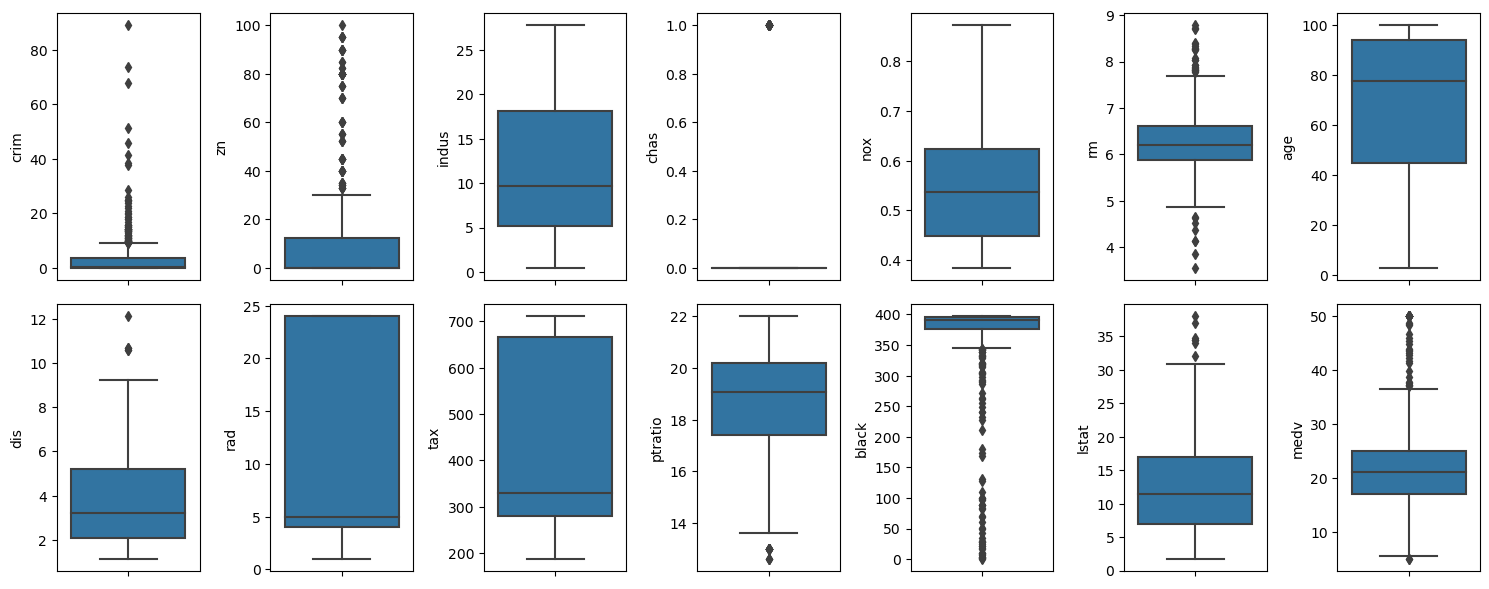

In [8]:
#checking for some outliers using boxplot
fig,ax=plt.subplots(2,7,figsize=(15,6))
axes=ax.flatten()
for i,col in list(enumerate(df.columns)):
    sns.boxplot(data=df,y=col,ax=axes[i])
plt.tight_layout()
plt.show()

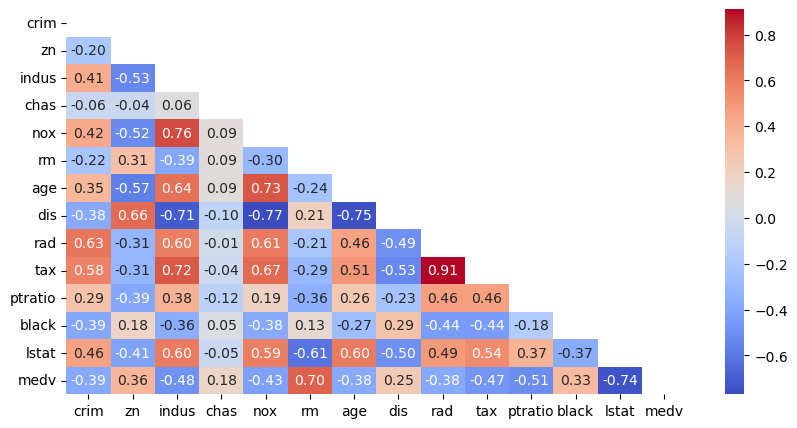

In [9]:
#correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

Tax and rad are highly correlated,so we will drop one of them during our analysis

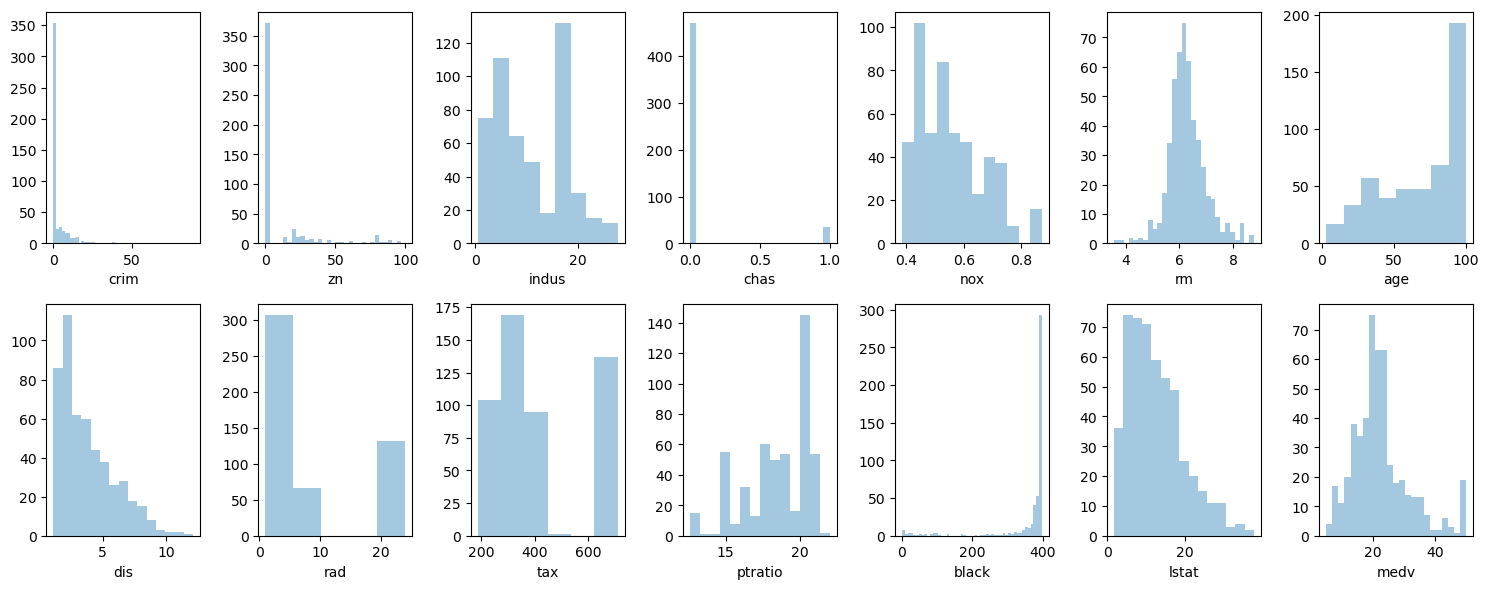

In [10]:
#data distribution
fig,ax=plt.subplots(2,7,figsize=(15,6))
axes=ax.flatten()
for i,col in list(enumerate(df.columns)):
    sns.distplot(a=df[col],kde=False,ax=axes[i])
    
plt.tight_layout()

plt.show()

As we can see there's some positive and negative skewed data,that we will look for using df.skew command

In [11]:
#skewed data
df.skew().sort_values(ascending=False)

crim       5.223149
chas       3.405904
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
black     -2.890374
dtype: float64

In [12]:
col1=[col for col in df.columns if col!='chas']

In [13]:
df[col1].skew().sort_values(ascending=False)

crim       5.223149
zn         2.225666
medv       1.108098
dis        1.011781
rad        1.004815
lstat      0.906460
nox        0.729308
tax        0.669956
rm         0.403612
indus      0.295022
age       -0.598963
ptratio   -0.802325
black     -2.890374
dtype: float64

In [14]:
# As more of our data is a positive skewed we will use log transformation
for col in col1:
    df[col]=np.log1p(df[col])

In [15]:
#all our variables now have some acceptable skew value, except for black wich was a negative skewed varible(we had to use sqrt function)
df[col1].skew().sort_values(ascending=False)

crim       1.269201
zn         1.193451
nox        0.584347
rad        0.532760
tax        0.331753
dis        0.331561
rm        -0.182929
lstat     -0.187195
medv      -0.241244
indus     -0.424030
ptratio   -1.002982
age       -1.596349
black     -4.459061
dtype: float64

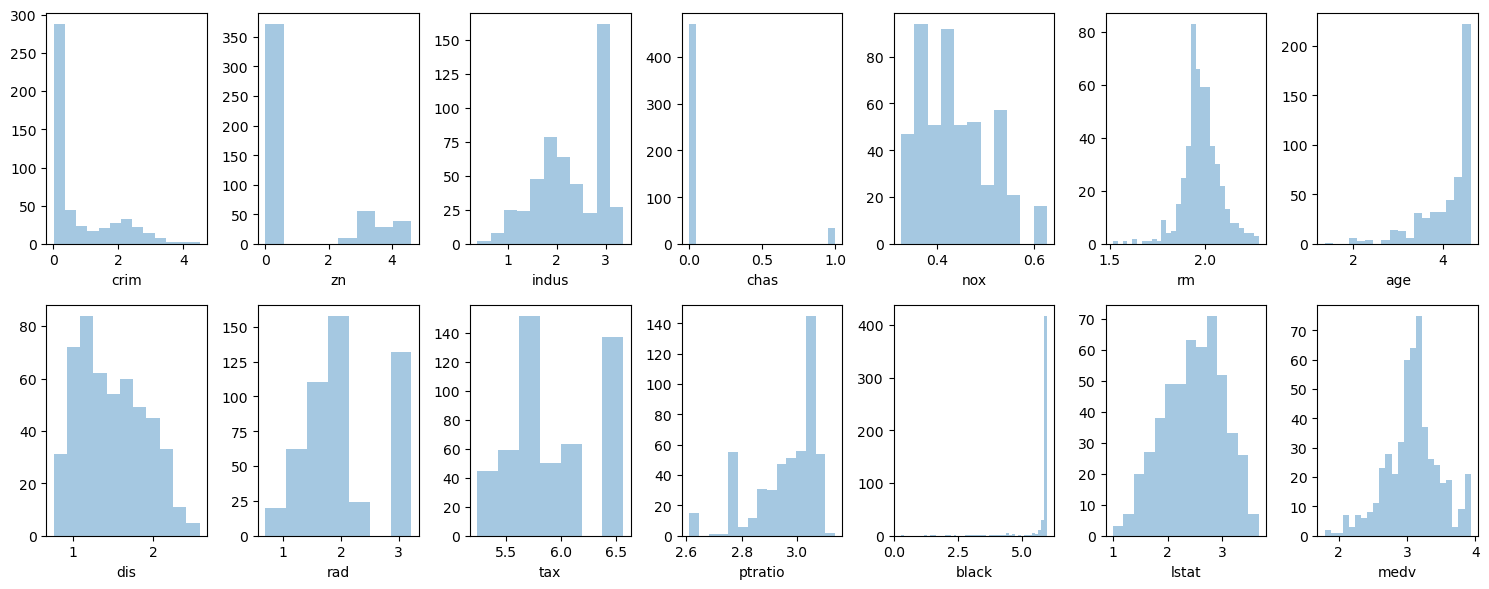

In [16]:
#data distribution after log transformation
fig,ax=plt.subplots(2,7,figsize=(15,6))
axes=ax.flatten()
for i,col in list(enumerate(df.columns)):
    sns.distplot(a=df[col],kde=False,ax=axes[i])
    
plt.tight_layout()
plt.show()

In [17]:
#getting our target varibale
x=df.drop(['medv','rad'],axis=1)
y=df['medv']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
#split our dataset  into a training and a test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,x_test.shape

((354, 12), (152, 12))

### Scaling
Feature scaling is a technique used to normalise the range of features in a dataset.

Some algorithms are sensitive to feature scaling (e.g. SVMs), while others are invariant (e.g. Random Forests).

In our case, we need to standardise the continuous features.

We will use scikit-learn's StandardScaler() transformer, which standardises features by subtracting the mean and dividing by the 

standard deviation. 

This transformation results in features with zero mean and unit variance.

In [20]:
#As we are using Ridge, lasso and SVR we need to scale our data
sc=StandardScaler()
x_train_s=sc.fit_transform(x_train)
x_test_s=sc.transform(x_test)

### Building Machine Learning Models
For this step we will use 2 different approaches:

first we will compare different ML models separatly using GridsearchCV for each model,then we will create a pipeline within 
GridSearchCV with all the necessary models and parametres to get the best model with the appropriate parametres and to avoid
any data leackage.


In [21]:
#lasso
param_grid_ls={'alpha':[0.01,0.1,1,10,20]}
grid_search_ls=GridSearchCV(Lasso(),param_grid_ls,cv=5,scoring='neg_mean_squared_error')
grid_search_ls.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20]},
             scoring='neg_mean_squared_error')

In [22]:
#Ridge
param_grid_rg={'alpha':[0.01,0.1,1,10,20]}
grid_search_rg=GridSearchCV(Ridge(),param_grid_rg,cv=5,scoring='neg_mean_squared_error')
grid_search_rg.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20]},
             scoring='neg_mean_squared_error')

In [23]:
#svr
param_grid_svr={'C':[0.1,1,10],'kernel':['linear','rbf']}
grid_search_svr=GridSearchCV(SVR(),param_grid_svr,cv=5,scoring='neg_mean_squared_error')
grid_search_svr.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [24]:
#Decision trees
param_grid_dt = {'max_depth': [None, 5, 10,15,20,50]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5,scoring='neg_mean_squared_error')
grid_search_dt.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20, 50]},
             scoring='neg_mean_squared_error')

In [25]:
#Random Forest
param_grid_rf = {'max_depth': [None, 5, 10,15,20,50],'n_estimators':[1,5,10,15]}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5,scoring='neg_mean_squared_error')
grid_search_rf.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15, 20, 50],
                         'n_estimators': [1, 5, 10, 15]},
             scoring='neg_mean_squared_error')

In [26]:
#Lasso results
best_model_ls=grid_search_ls.best_estimator_
y_pred_ls=best_model_ls.predict(x_test_s)
mse_lr=mean_squared_error(y_test,y_pred_ls)
mse_lr

0.03718456234622134

In [27]:
#Ridge results
best_model_rg=grid_search_rg.best_estimator_
y_pred_rg=best_model_rg.predict(x_test_s)
mse_rg=mean_squared_error(y_test,y_pred_rg)
mse_rg

0.03482342660905387

In [28]:
#SVR results
best_model_svr=grid_search_svr.best_estimator_
y_pred_svr=best_model_svr.predict(x_test_s)
mse_svr=mean_squared_error(y_test,y_pred_svr)
mse_svr

0.02169653183256959

In [29]:
grid_search_svr.best_params_

{'C': 1, 'kernel': 'rbf'}

In [30]:
#Decision Trees results
best_model_dt=grid_search_dt.best_estimator_
y_pred_dt=best_model_dt.predict(x_test_s)
mse_dt=mean_squared_error(y_test,y_pred_dt)
mse_dt

0.03242164222664906

In [31]:
#Random Forest result
best_model_rf=grid_search_rf.best_estimator_
y_pred_rf=best_model_rf.predict(x_test_s)
mse_rf=mean_squared_error(y_test,y_pred_rf)
mse_rf

0.025428835060281887

In [56]:
#let's get all our result of MSE and r2 score in a Dataframe
results=pd.DataFrame({'models':['Lasso','Ridge','SVR','Decision Trees','Random Forest'],
'MSE':[mse_lr,mse_rg,mse_svr,mse_dt,mse_rf],
'R2_score':[r2_score(y_test,y_pred_ls),r2_score(y_test,y_pred_rg),r2_score(y_test,y_pred_svr),r2_score(y_test,y_pred_dt),
           r2_score(y_test,y_pred_rf)]})
results

,models,MSE,R2_score
0,Lasso,0.037185,0.729615
1,Ridge,0.034823,0.746784
2,SVR,0.021697,0.842235
3,Decision Trees,0.032422,0.764248
4,Random Forest,0.025429,0.815096


In [33]:
#Sorting this Dataframe with the smallest MSE
results.sort_values(['MSE','R2_score'],ascending=True).reset_index(drop=True)


,models,MSE,R2_score
0,SVR,0.021697,0.842235
1,Random Forest,0.025429,0.815096
2,Decision Trees,0.032422,0.764248
3,Ridge,0.034823,0.746784
4,Lasso,0.037185,0.729615


As we can see SVR with the Kernel trick is doing much better than the other model with an MSE of 0.021 and R2 score of 0.84

In [36]:
#getting our test data and predictions in one Dataframe
df_svr=pd.DataFrame({'test':y_test,'pred':y_pred_svr})
df_svr=np.expm1(df_svr)
df_svr.head()

,test,pred
173,23.6,24.671607
274,32.4,32.407790
491,13.6,15.632226
72,22.8,23.921666
452,16.1,16.338749


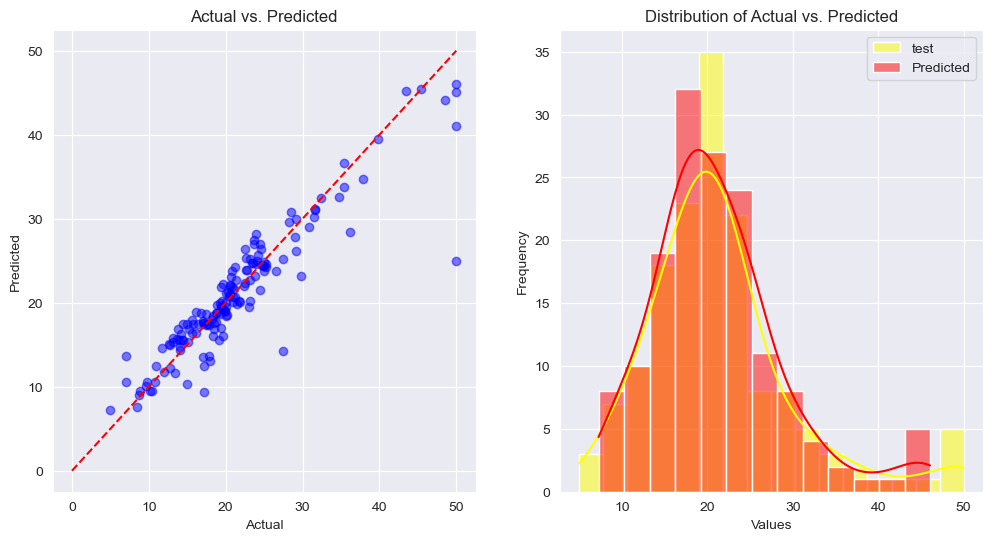

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
max_val=max(max(df_svr['test']),max(df_svr['pred']))
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')
plt.scatter(df_svr['test'], df_svr['pred'], color='blue', alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')


plt.subplot(1, 2, 2)
sns.histplot(df_svr['test'], color='yellow', label='test', kde=True)
sns.histplot(df_svr['pred'], color='red', label='Predicted', kde=True)
plt.title('Distribution of Actual vs. Predicted')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.show()

As we can see the points  align along a diagonal line, indicating that the predicted values closely match the actual values. 

Deviations from this diagonal line suggest errors in prediction.

With the test and predictions distribution overlap we can suggest that the model is capturing the underlying patterns in the data reasonably well.

The fact that the predicted values are close to the actual values indicates that the model is making predictions that align with the true observations. 

Despite the overlap, there may still be areas where the model performs poorly where actual value>40 wich may require further investigation to understand why the model's predictions differ from the actual values

### Create a ML pipeline

For now we will introduce some new boosting algorithms as Adaboost and Xgboost.

we will try to organize our machine learning workflow by using Pipelines in order to link different step together and make the
process faster.

In [38]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('scaler',StandardScaler()),('model',None)])

In [39]:
param_grid=[
    {
    'model':[Lasso()],
    'model__alpha':[0.1,1,10,20,30,100]
    },
    {
        'model':[AdaBoostRegressor()],
        'model__n_estimators':[50, 100, 150],
        'model__learning_rate': [0.01, 0.1, 1.0]
    },
    {
        'model':[DecisionTreeRegressor()],
        'model__max_depth':[1,10,20,30,40,50,100]
    },
    {
        'model':[RandomForestRegressor()],
        'model__max_depth':[1,10,20,30,40,50,100],
        'model__n_estimators':[1,10,20,40,50,100,150,120]
    },
    {
        'model':[XGBRegressor()],
        'model__n_estimators':[50, 100, 150],
        'model__learning_rate': [0.01, 0.1, 1.0],
        'model__max_depth':[3, 5, 7]
        
    }
]

In [40]:
grid_comp=GridSearchCV(pipeline,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_comp.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', None)]),
             param_grid=[{'model': [Lasso()],
                          'model__alpha': [0.1, 1, 10, 20, 30, 100]},
                         {'model': [AdaBoostRegressor()],
                          'model__learning_rate': [0.01, 0.1, 1.0],
                          'model__n_estimators': [50, 100, 150]},
                         {'model': [DecisionTreeRegressor()],
                          'model__max_depth': [1, 10, 20, 30, 40, 50, 100]},
                         {'model': [...
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=5, max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
           

In [41]:
model_comp=grid_comp.best_estimator_
model_comp

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_para

In [42]:
grid_comp.best_params_

{'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 100}

In [43]:
y_pred_comp=model_comp.predict(x_test)
print(mean_squared_error(y_test,y_pred_comp))

0.02027890752999471


In [44]:
print(r2_score(y_test,y_pred_comp))

0.8525431274843283


In [45]:
model_comp.named_steps['model'].feature_importances_

array([0.02505278, 0.00562795, 0.01081087, 0.01282842, 0.10814887,
       0.07653753, 0.01580241, 0.03976545, 0.02086197, 0.05679665,
       0.01329628, 0.61447084], dtype=float32)

In [46]:
cols=model_comp.named_steps['scaler'].get_feature_names_out(input_features=x.columns)
cols

array(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'black', 'lstat'], dtype=object)

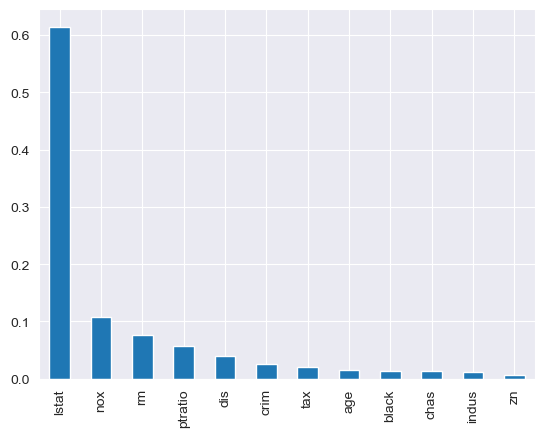

In [47]:
pd.Series(index=cols,data=model_comp.named_steps['model'].feature_importances_).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [57]:
#adding xg_boost results
xg_result={'models':'xg boost','MSE':mean_squared_error(y_test,y_pred_comp),'R2_score':r2_score(y_test,y_pred_comp)}
results=results.append(xg_result,ignore_index=True)
results

,models,MSE,R2_score
0,Lasso,0.037185,0.729615
1,Ridge,0.034823,0.746784
2,SVR,0.021697,0.842235
3,Decision Trees,0.032422,0.764248
4,Random Forest,0.025429,0.815096
5,xg boost,0.020279,0.852543


In [60]:
results=results.sort_values(['MSE','R2_score'],ascending=True).reset_index(drop=True)
results

,models,MSE,R2_score
0,xg boost,0.020279,0.852543
1,SVR,0.021697,0.842235
2,Random Forest,0.025429,0.815096
3,Decision Trees,0.032422,0.764248
4,Ridge,0.034823,0.746784
5,Lasso,0.037185,0.729615


As we can see XG boost did a fantastic job on our dataset, at both reducing the MSE or explaining the variance with the highest R2 score of 0.85.